In [11]:
import numpy as np

data=np.load('data.npy')
target=np.load('target.npy')



In [12]:
from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten,Dropout
from keras.layers import Conv2D,MaxPooling2D
from keras.callbacks import ModelCheckpoint

model=Sequential()

model.add(Conv2D(200,(3,3),input_shape=data.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(100,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dropout(0.5))

model.add(Dense(50,activation='relu'))

model.add(Dense(2,activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [13]:
from sklearn.model_selection import train_test_split

train_data,test_data,train_target,test_target=train_test_split(data,target,test_size=0.1)

In [14]:
checkpoint = ModelCheckpoint('model-{epoch:03d}.model',monitor='val_loss',verbose=0,save_best_only=True,mode='auto')
history=model.fit(train_data,train_target,epochs=20,callbacks=[checkpoint],validation_split=0.2)

Train on 990 samples, validate on 248 samples
Epoch 1/20
990/990 [==============================] - 41s 41ms/step - loss: 0.7376 - accuracy: 0.5121 - val_loss: 0.6958 - val_accuracy: 0.4919
Epoch 2/20
990/990 [==============================] - 44s 44ms/step - loss: 0.6540 - accuracy: 0.6051 - val_loss: 0.5893 - val_accuracy: 0.6411
Epoch 3/20
990/990 [==============================] - 43s 44ms/step - loss: 0.5227 - accuracy: 0.7424 - val_loss: 0.4759 - val_accuracy: 0.7944
Epoch 4/20
990/990 [==============================] - 44s 44ms/step - loss: 0.3680 - accuracy: 0.8485 - val_loss: 0.2754 - val_accuracy: 0.9032
Epoch 5/20
990/990 [==============================] - 43s 44ms/step - loss: 0.2738 - accuracy: 0.8848 - val_loss: 0.2255 - val_accuracy: 0.9113
Epoch 6/20
990/990 [==============================] - 43s 44ms/step - loss: 0.2285 - accuracy: 0.9141 - val_loss: 0.2050 - val_accuracy: 0.9274
Epoch 7/20
990/990 [==============================] - 43s 44ms/step - loss: 0.1652 - accur

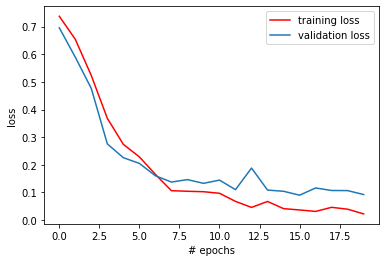

In [15]:
from matplotlib import pyplot as plt

plt.plot(history.history['loss'],'r',label='training loss')
plt.plot(history.history['val_loss'],label='validation loss')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

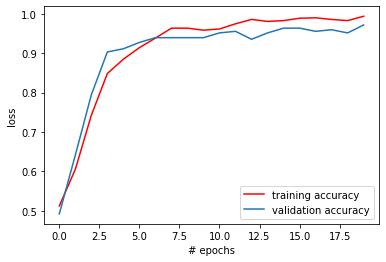

In [16]:
plt.plot(history.history['accuracy'],'r',label='training accuracy')
plt.plot(history.history['val_accuracy'],label='validation accuracy')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [17]:
print(model.evaluate(test_data,test_target))

138/138 [==============================] - 2s 12ms/step
[0.0720431642687839, 0.9927536249160767]
